In [1]:
%matplotlib inline
%autosave 0
%load_ext autoreload
%autoreload 2

Autosave disabled


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dtrace import rpath
from scipy.stats import pearsonr
from Associations import Association
from dtrace.RobustAssociations import RobustAssociations

### Import data-sets and associations

In [3]:
assoc = Association(dtype="ic50", load_associations=True, load_robust=True)

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (6,28) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


[2019-02-28 10:31:20,590 - INFO]: #(Samples)=500
[2019-02-28 10:31:26,502 - INFO]: #(Drugs)=589; #(Genes)=16818; #(Genomic)=536; 


/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [4]:
robust = RobustAssociations(assoc)

## Robust pharmacogenomic associations

Robust pharmacogenomic associations represent pairs of Drug-Gene (drug-response and gene-essentiality) that are
significantly correlated with each other and with a genomic feature (copy-number/mutations) or a gene expression
profile.

In [5]:
robust.assoc.lmm_robust_genomic.query("crispr_fdr < 0.1 & drug_fdr < 0.1").head(
    15
).sort_values("drug_fdr")

,DRUG_ID,DRUG_NAME,VERSION,beta,pval,GeneSymbol,n_samples,fdr,DRUG_TARGETS,target_detailed,target,feature,drug_beta,drug_pval,drug_fdr,crispr_beta,crispr_pval,crispr_fdr
0,1373,Dabrafenib,v17,0.494593,3.466679e-20,BRAF,439,5.830261e-16,BRAF,T,T,BRAF_mut,-1.981553,1.999609e-21,1.035797e-18,-2.105672,4.459569e-26,2.390329e-23
1,1373,Dabrafenib,v17,0.308247,2.831142e-09,MAPK1,439,2.380707e-05,BRAF,1,1,BRAF_mut,-1.981553,1.999609e-21,1.035797e-18,-1.641637,1.956764e-18,1.048825e-15
2,1373,Dabrafenib,v17,0.281940,1.763076e-07,PEA15,439,9.883803e-04,BRAF,2,2,BRAF_mut,-1.981553,1.999609e-21,1.035797e-18,-1.339092,1.429508e-15,7.662162e-13
4,1373,Dabrafenib,v17,0.224449,2.074283e-05,DUSP4,439,6.977059e-02,BRAF,2,2,BRAF_mut,-1.981553,1.999609e-21,1.035797e-18,-0.995540,7.767502e-09,4.163381e-06
5,1061,SB590885,v17,0.354917,2.631127e-10,BRAF,421,4.425030e-06,BRAF,T,T,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-2.105672,4.459569e-26,2.390329e-23
6,1061,SB590885,v17,0.300016,1.544962e-08,MAPK1,421,1.299158e-04,BRAF,1,1,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-1.641637,1.956764e-18,1.048825e-15
7,1061,SB590885,v17,0.375204,6.555145e-08,SOX10,421,3.674814e-04,BRAF,No link; Gene not in network,-,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-1.091492,2.591679e-10,1.389140e-07
8,1061,SB590885,v17,0.295829,5.011053e-07,MITF,421,2.106897e-03,BRAF,2,2,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-0.983341,8.632548e-09,4.627045e-06
9,1061,SB590885,v17,0.295473,6.749746e-07,DUSP4,421,2.270345e-03,BRAF,2,2,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-0.995540,7.767502e-09,4.163381e-06
10,1061,SB590885,v17,0.233165,1.667087e-05,PEA15,421,4.672844e-02,BRAF,2,2,BRAF_mut,-1.589553,2.594821e-16,1.292221e-13,-1.339092,1.429508e-15,7.662162e-13


In [6]:
robust.assoc.lmm_robust_gexp.query("crispr_fdr < 0.1 & drug_fdr < 0.1").head(
    15
).sort_values("drug_fdr")

,DRUG_ID,DRUG_NAME,VERSION,beta,pval,GeneSymbol,n_samples,fdr,DRUG_TARGETS,target_detailed,target,feature,drug_beta,drug_pval,drug_fdr,crispr_beta,crispr_pval,crispr_fdr
6,2354,MCL1_8070,RS,0.511217,2.538420e-36,MCL1,402,4.269115e-32,MCL1,T,T,BCL2L1,0.524781,1.640090e-14,2.520490e-10,0.457291,7.504850e-11,1.153345e-06
9,1047,Nutlin-3a (-),v17,0.491450,1.346782e-17,MDM2,431,2.265018e-13,MDM2,T,T,MDM2,-0.383170,1.900620e-13,2.557706e-09,-0.355285,3.181415e-13,6.984569e-10
11,1047,Nutlin-3a (-),v17,0.388340,9.729364e-12,PPM1D,431,5.454281e-08,MDM2,1,1,MDM2,-0.383170,1.900620e-13,2.557706e-09,-0.205486,5.058931e-05,3.239402e-02
12,1047,Nutlin-3a (-),v17,-0.448472,2.267795e-09,TP53,431,9.534943e-06,MDM2,1,1,MDM2,-0.383170,1.900620e-13,2.557706e-09,0.270228,1.909789e-07,2.096403e-04
13,1047,Nutlin-3a (-),v17,0.318860,3.573370e-07,USP7,431,1.122504e-03,MDM2,1,1,MDM2,-0.383170,1.900620e-13,2.557706e-09,-0.207883,9.519867e-05,7.716166e-02
14,1047,Nutlin-3a (-),v17,-0.331070,4.004651e-07,USP28,431,1.122504e-03,MDM2,3,3,MDM2,-0.383170,1.900620e-13,2.557706e-09,0.301847,7.361189e-09,2.013619e-05
16,1047,Nutlin-3a (-),v17,-0.243278,1.040595e-05,TP53BP1,431,2.187591e-02,MDM2,2,2,MDM2,-0.383170,1.900620e-13,2.557706e-09,0.262188,3.173424e-07,9.753835e-04
17,1047,Nutlin-3a (-),v17,0.491450,1.346782e-17,MDM2,431,2.265018e-13,MDM2,T,T,FDXR,-0.406655,3.328612e-13,2.557706e-09,-0.422127,2.165759e-15,8.320847e-12
18,1047,Nutlin-3a (-),v17,0.379128,1.527403e-12,MDM4,431,1.284393e-08,MDM2,1,1,FDXR,-0.406655,3.328612e-13,2.557706e-09,-0.313428,1.126978e-08,3.490923e-05
19,1047,Nutlin-3a (-),v17,0.388340,9.729364e-12,PPM1D,431,5.454281e-08,MDM2,1,1,FDXR,-0.406655,3.328612e-13,2.557706e-09,-0.298786,4.023233e-08,8.832721e-05


Frequency of the genomic features across the cancer cell lines

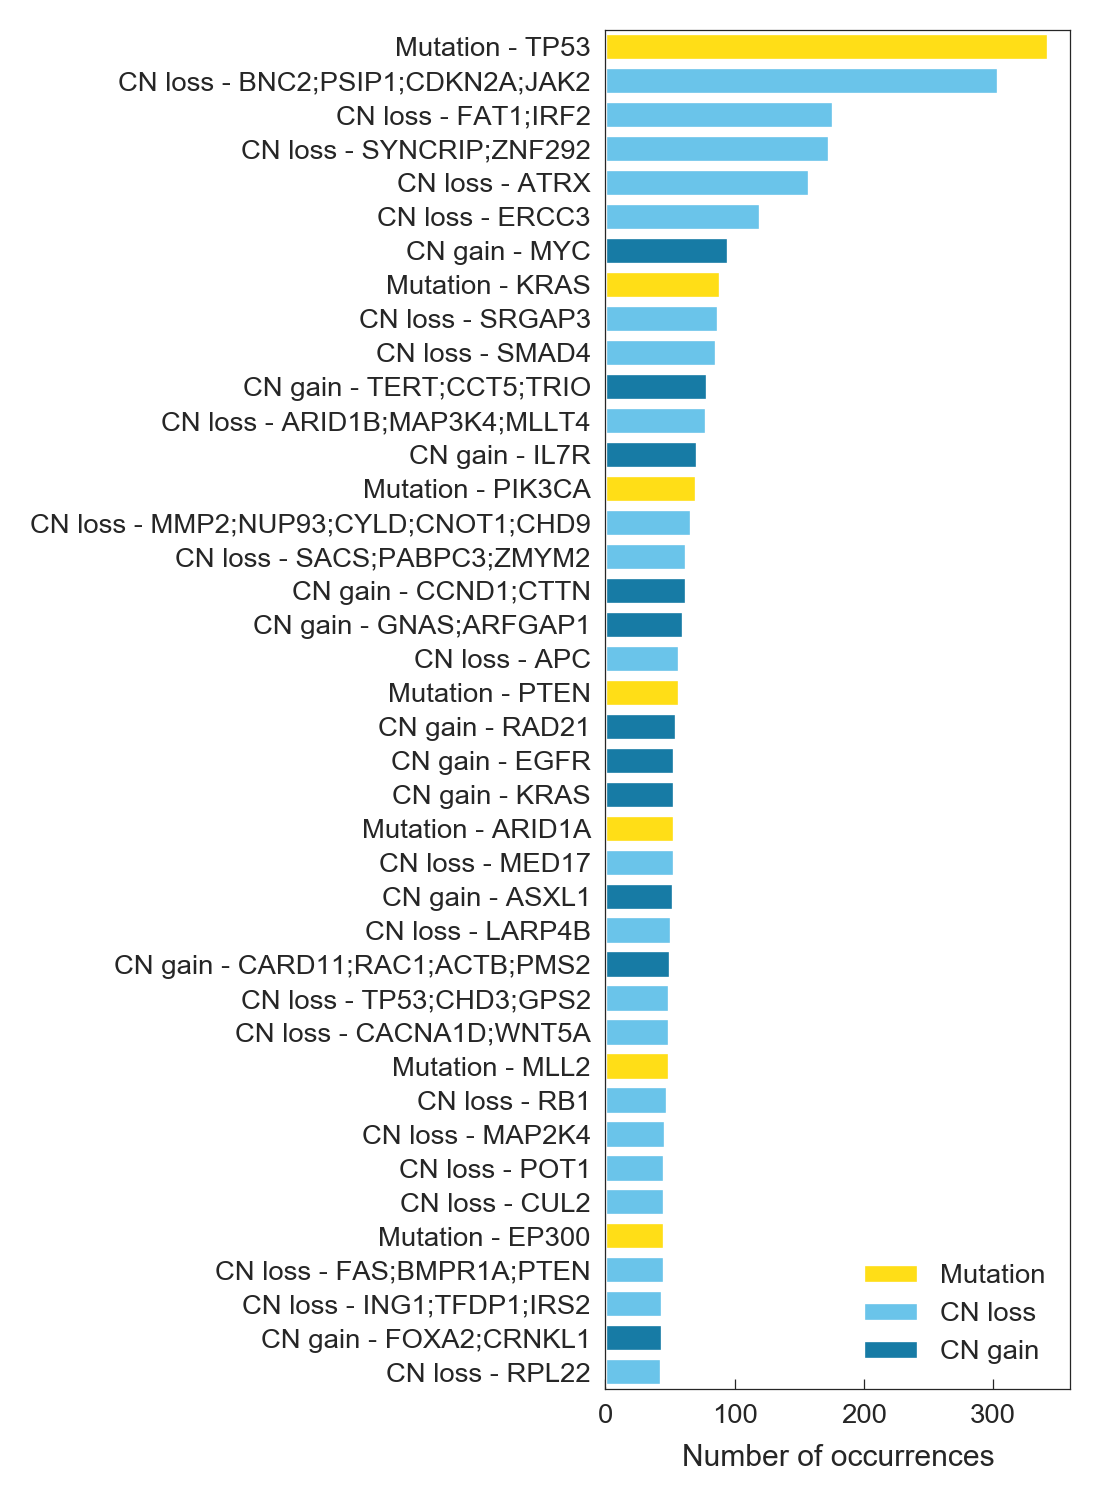

In [7]:
plt.figure(dpi=300)
robust.genomic_histogram()
plt.savefig(
    f"{rpath}/robust_mobems_countplot.pdf", bbox_inches="tight", transparent=True
)

Top associations of drug and CRISPR wiht genomic features

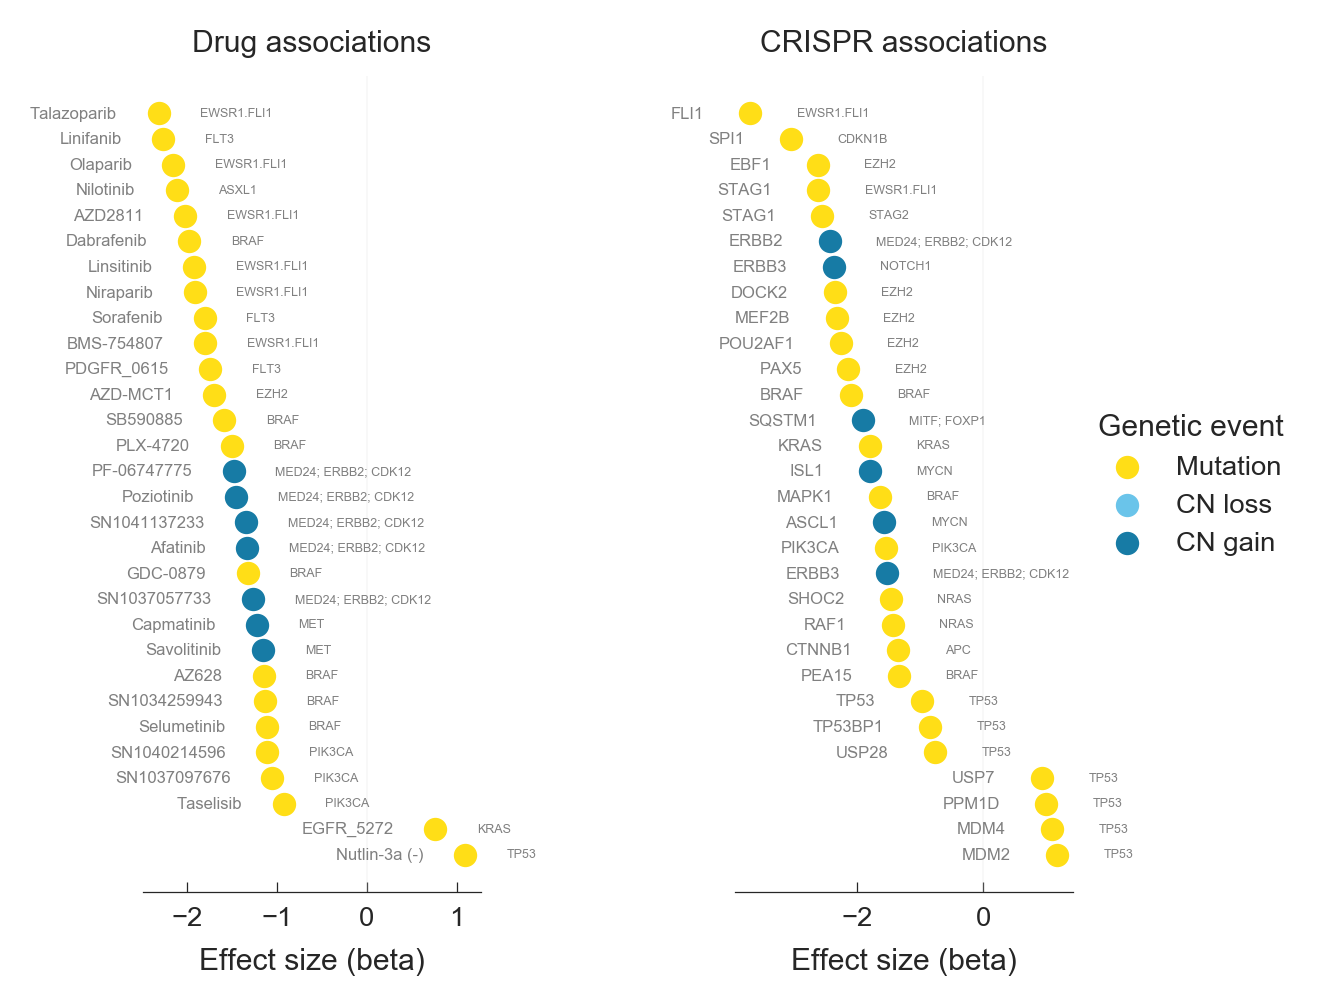

In [9]:
robust.top_robust_features()
plt.savefig(
    f"{rpath}/robust_top_associations.pdf", bbox_inches="tight", transparent=True
)

Top associations of drug and CRISPR with gene-expression

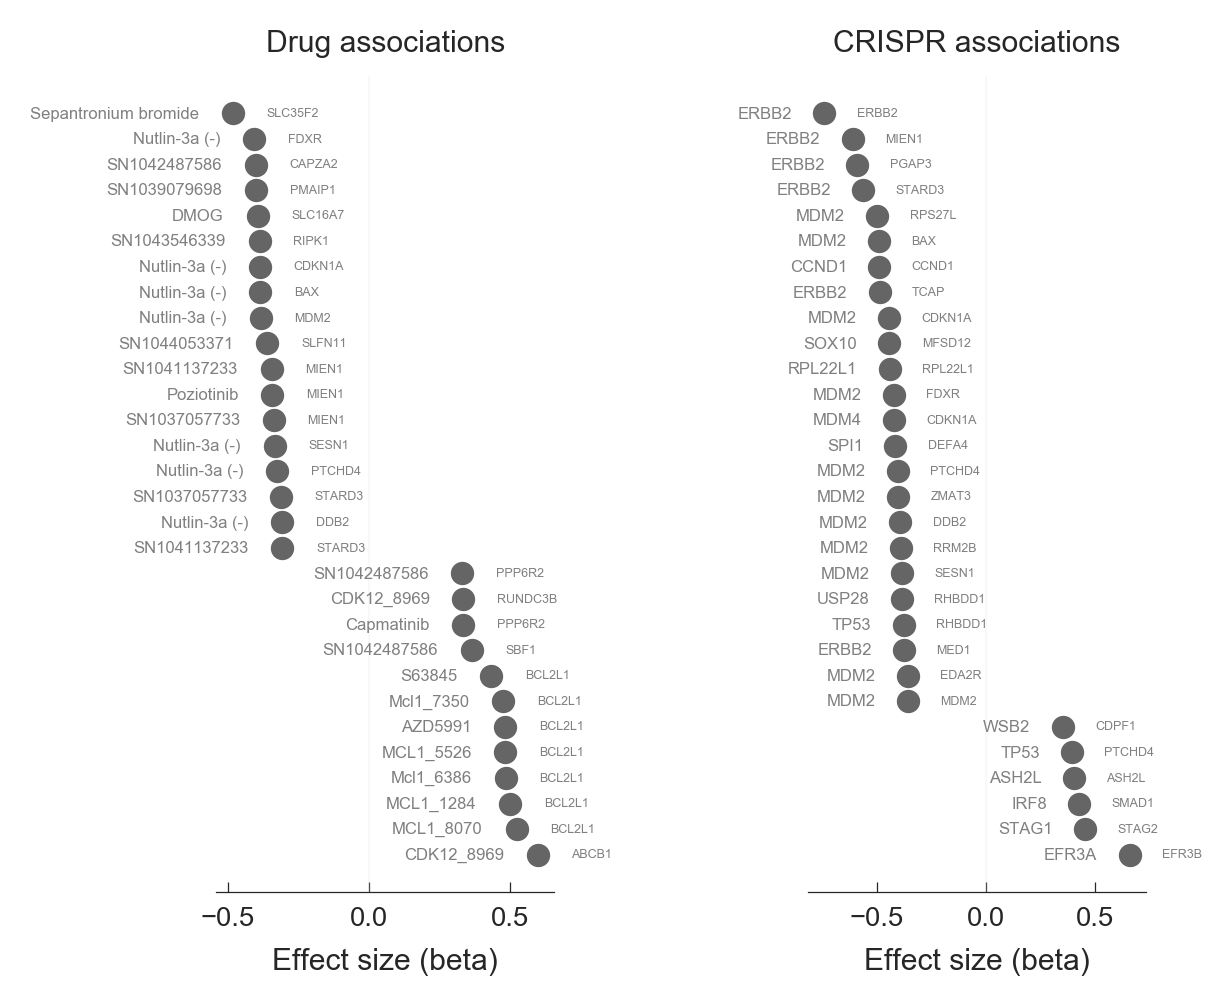

In [10]:
robust.top_robust_features(dtype="gene-expression")
plt.savefig(
    f"{rpath}/robust_top_associations_gexp.pdf", bbox_inches="tight", transparent=True
)

Significant associations count

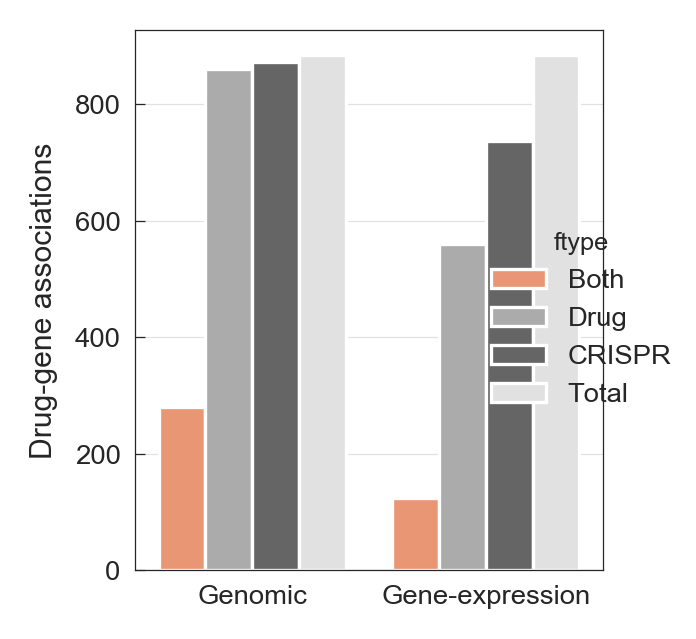

In [15]:
robust.robust_associations_barplot()
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/robust_signif_association_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)

Significant associations count distributed by distance in the protein-protein interaction network

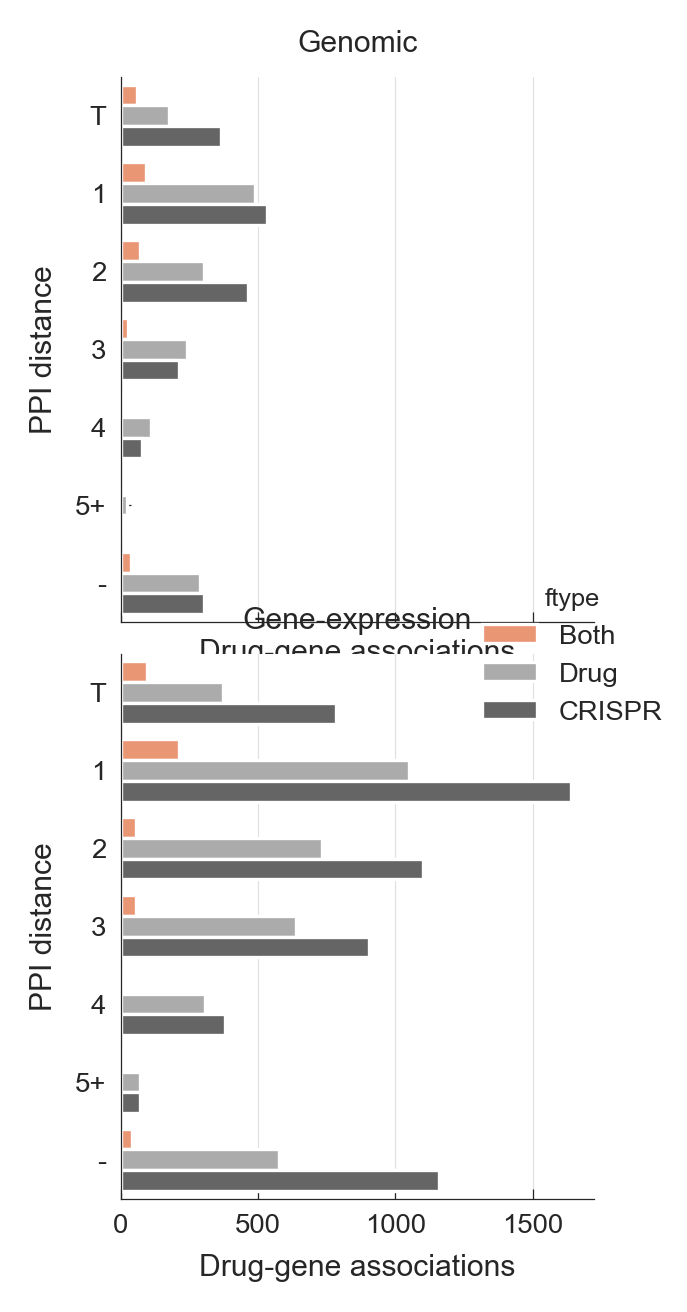

In [17]:
robust.robust_associations_barplot_ppi()
plt.gcf().set_size_inches(2, 4)
plt.savefig(
    f"{rpath}/robust_signif_association_barplot_ppi.pdf",
    bbox_inches="tight",
    transparent=True,
)

Representative examples of robust pharmacogenomic associations with copy-number and mutations

In [18]:
rassocs = [
    ("Olaparib", "FLI1", "EWSR1.FLI1_mut"),
    ("Dabrafenib", "BRAF", "BRAF_mut"),
    ("Nutlin-3a (-)", "MDM2", "TP53_mut"),
    ("Taselisib", "PIK3CA", "PIK3CA_mut"),
    ("MCL1_1284", "MCL1", "EZH2_mut"),
]

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


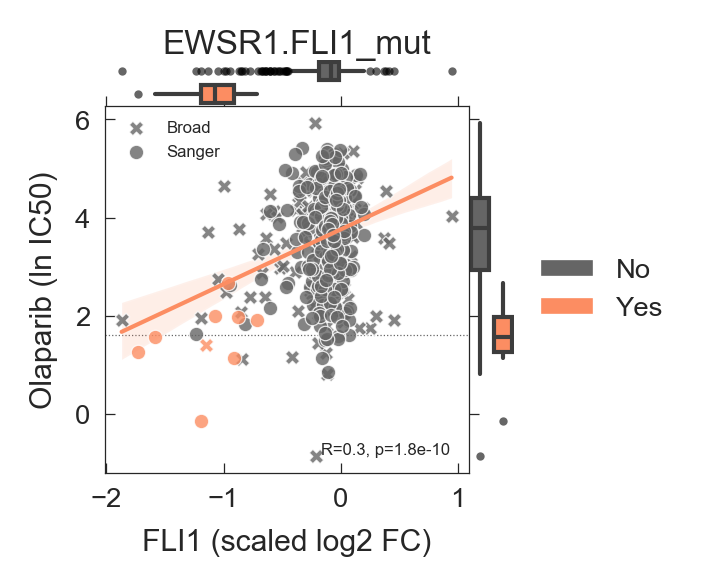

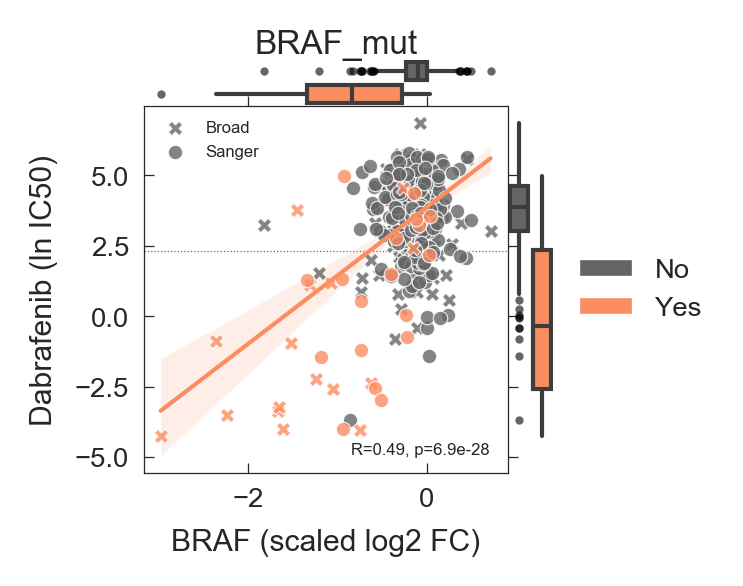

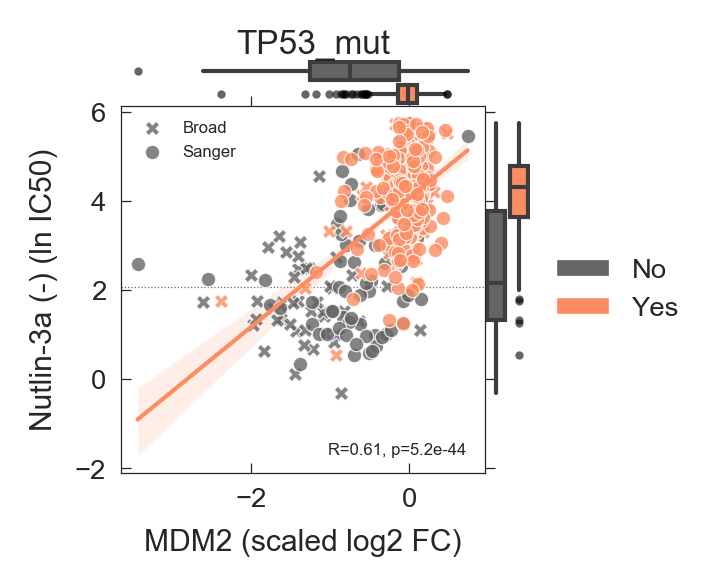

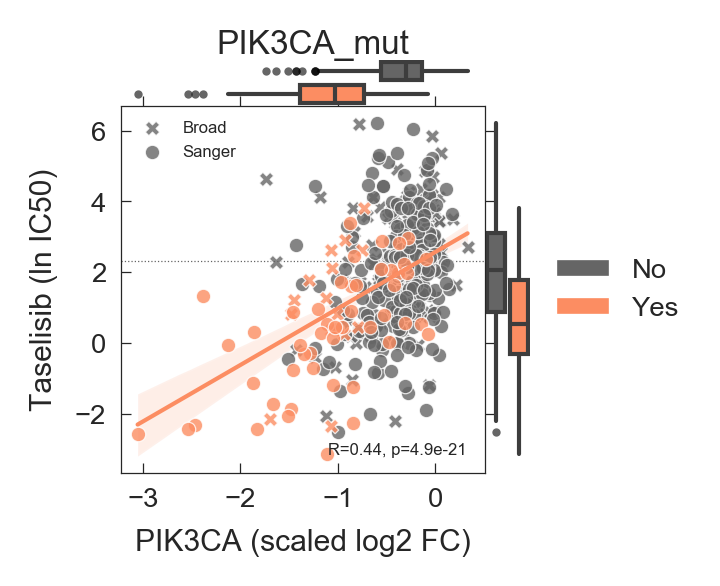

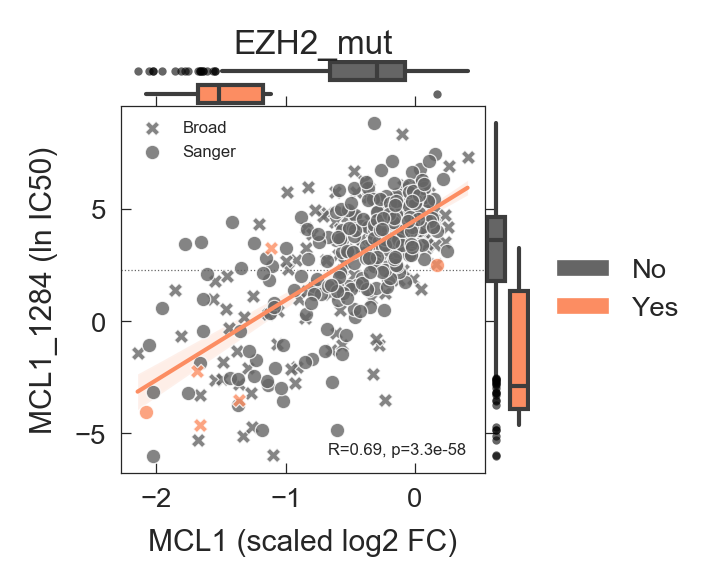

In [19]:
# d, c, g = ('Linifanib', 'STAT5B', 'XRN1_mut')
for d, c, g in rassocs:
    pair = robust.assoc.by(
        robust.assoc.lmm_robust_genomic, drug_name=d, gene_name=c, feature=g
    ).iloc[0]

    drug = tuple(pair[robust.assoc.dcols])

    dmax = np.log(robust.assoc.drespo_obj.maxconcentration[drug])

    plot_df = robust.assoc.build_df(
        drug=[drug], crispr=[c], genomic=[g], sinfo=["institute"]
    ).dropna()
    plot_df = plot_df.rename(columns={drug: "drug"})

    grid = robust.plot_corrplot_discrete(f"crispr_{c}", "drug", g, "institute", plot_df)

    grid.ax_joint.axhline(
        y=dmax, linewidth=0.3, color=robust.PAL_DTRACE[2], ls=":", zorder=0
    )

    grid.set_axis_labels(f"{c} (scaled log2 FC)", f"{d} (ln IC50)")

    plt.suptitle(g, y=1.05, fontsize=8)

    plt.gcf().set_size_inches(1.5, 1.5)
    plt.savefig(
        f"{rpath}/robust_scatter_{d}_{c}_{g}.pdf", bbox_inches="tight", transparent=True
    )
    plt.show()

Representative examples of robust pharmacogenomic associations with gene-expression

In [21]:
rassocs = [
    ("MCL1_1284", "MCL1", "BCL2L1"),
    ("Linsitinib", "IGF1R", "IGF1R"),
    ("SN1041137233", "ERBB2", "ERBB2"),
    ("Nutlin-3a (-)", "MDM2", "BAX"),
    ("Venetoclax", "BCL2", "CDC42BPA"),
    ("AZD5582", "MAP3K7", "TNF"),
    ("SN1021632995", "MAP3K7", "TNF"),
    ("SN1043546339", "MAP3K7", "TNF"),
]

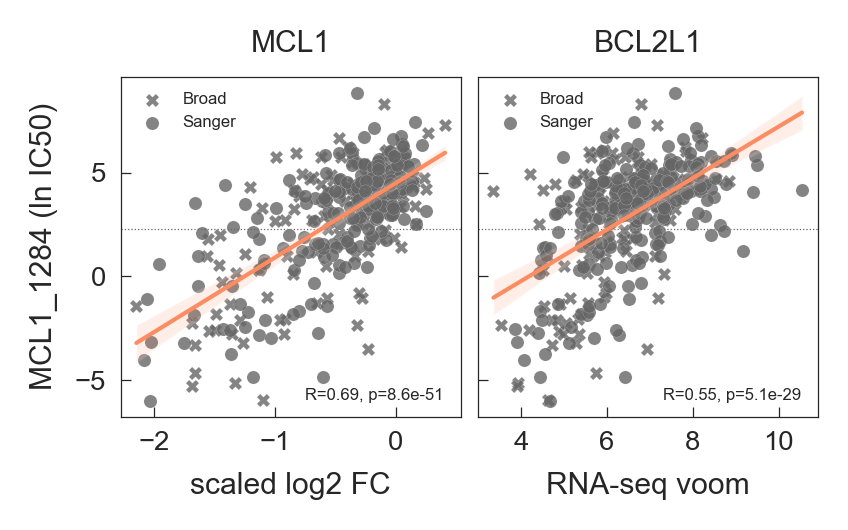

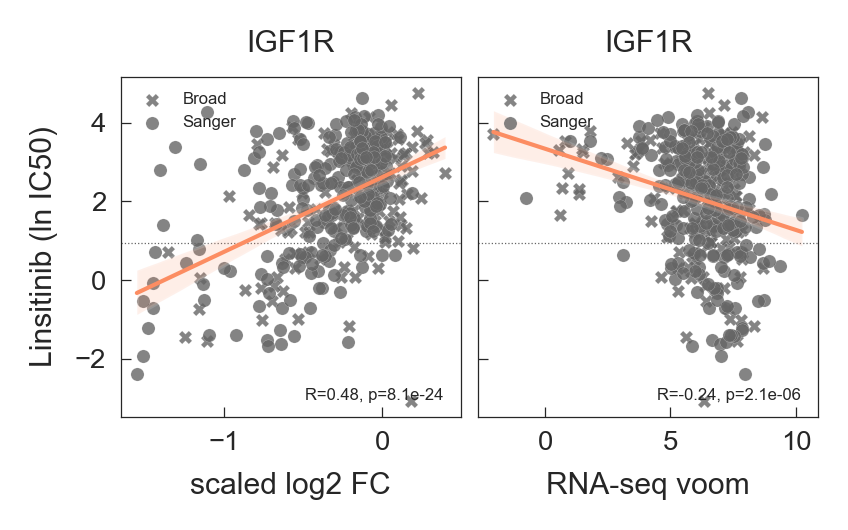

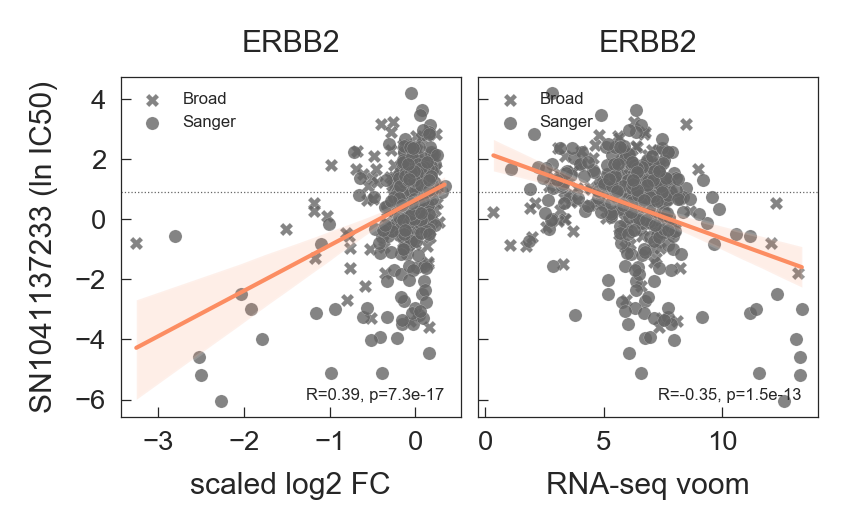

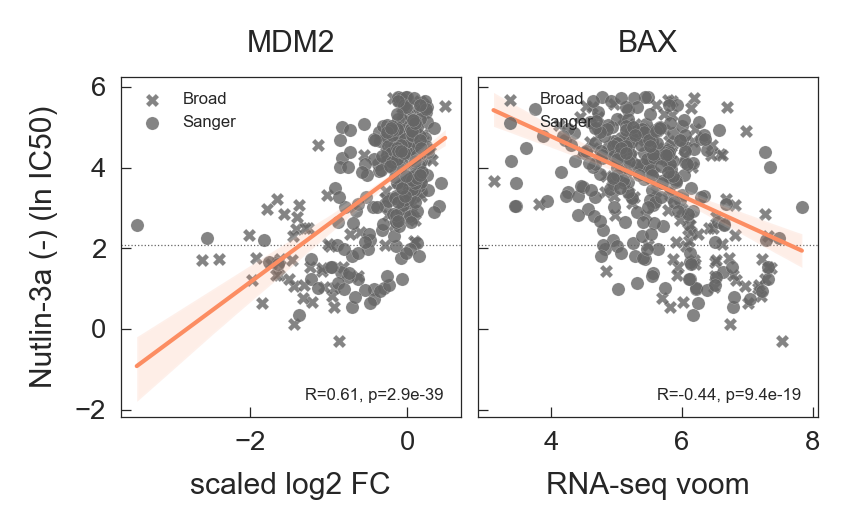

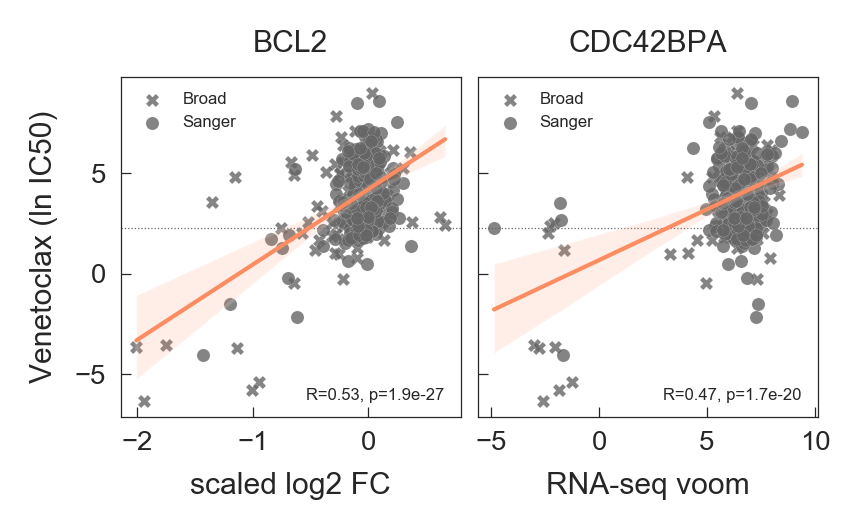

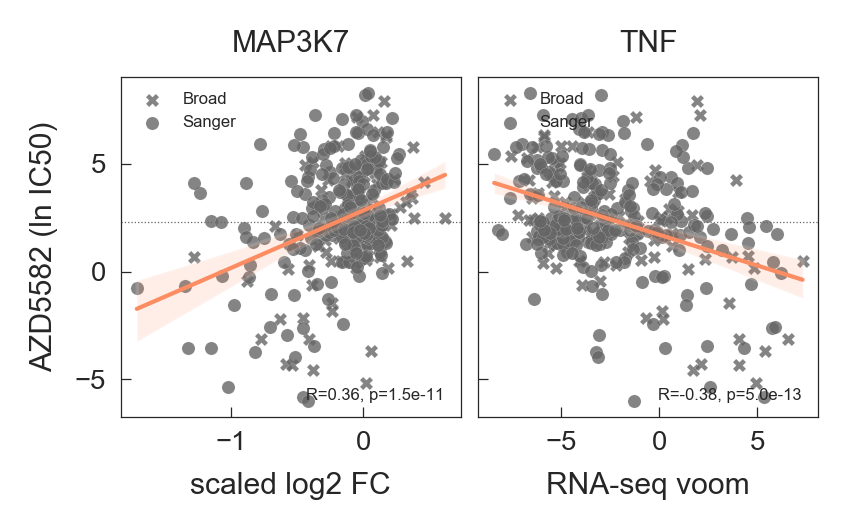

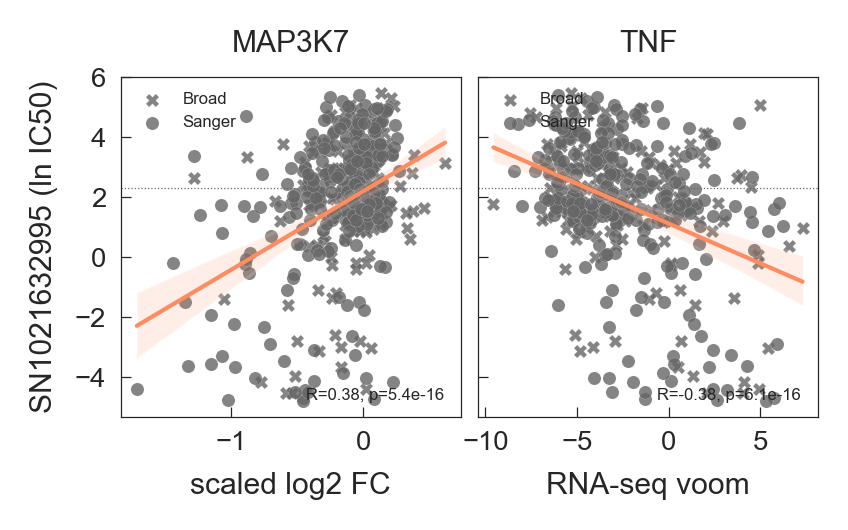

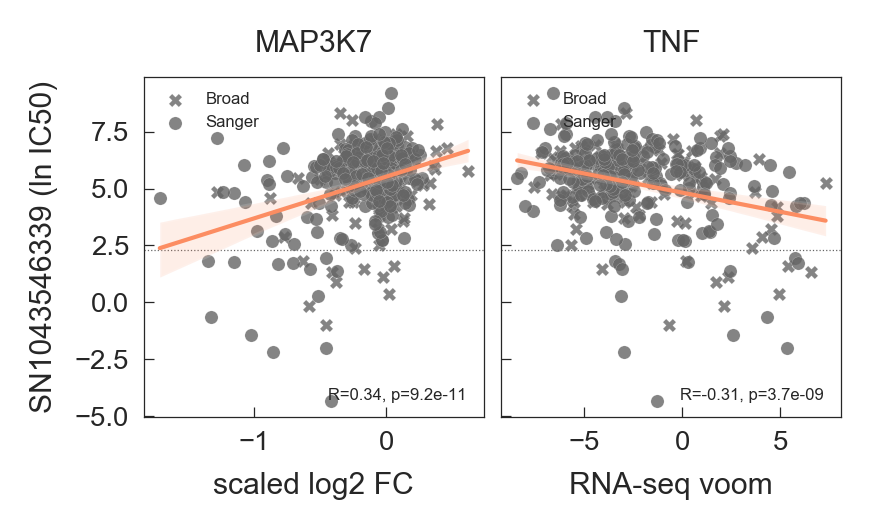

In [22]:
for d, c, g in rassocs:
    pair = robust.assoc.by(
        robust.assoc.lmm_robust_gexp, drug_name=d, gene_name=c, feature=g
    ).iloc[0]

    drug = tuple(pair[robust.assoc.dcols])
    dmax = np.log(robust.assoc.drespo_obj.maxconcentration[drug])

    plot_df = robust.assoc.build_df(
        drug=[drug], crispr=[c], gexp=[g], sinfo=["institute", "cancer_type"]
    ).dropna()
    plot_df = plot_df.rename(columns={drug: "drug"})

    #
    fig, axs = plt.subplots(1, 2, sharey="row", sharex="none", dpi=300)

    for i, dtype in enumerate(["crispr", "gexp"]):
        # Scatter
        for t, df in plot_df.groupby("institute"):
            axs[i].scatter(
                x=df[f"{dtype}_{c}" if dtype == "crispr" else f"{dtype}_{g}"],
                y=df["drug"],
                edgecolor="w",
                lw=0.05,
                s=10,
                color=robust.PAL_DTRACE[2],
                marker=robust.MARKERS[t],
                label=t,
                alpha=0.8,
            )

        # Reg
        sns.regplot(
            x=plot_df[f"{dtype}_{c}" if dtype == "crispr" else f"{dtype}_{g}"],
            y=plot_df["drug"],
            data=plot_df,
            color=robust.PAL_DTRACE[1],
            truncate=True,
            fit_reg=True,
            scatter=False,
            line_kws=dict(lw=1.0, color=robust.PAL_DTRACE[0]),
            ax=axs[i],
        )

        # Annotation
        cor, pval = pearsonr(
            plot_df[f"{dtype}_{c}" if dtype == "crispr" else f"{dtype}_{g}"],
            plot_df["drug"],
        )
        annot_text = f"R={cor:.2g}, p={pval:.1e}"

        axs[i].text(
            0.95, 0.05, annot_text, fontsize=4, transform=axs[i].transAxes, ha="right"
        )

        # Misc
        axs[i].axhline(
            y=dmax, linewidth=0.3, color=robust.PAL_DTRACE[2], ls=":", zorder=0
        )

        axs[i].set_ylabel(f"{d} (ln IC50)" if i == 0 else "")
        axs[i].set_xlabel(f"scaled log2 FC" if dtype == "crispr" else f"RNA-seq voom")
        axs[i].set_title(c if dtype == "crispr" else g)

        # Legend
        axs[i].legend(prop=dict(size=4), frameon=False, loc=2)

    plt.subplots_adjust(wspace=0.05)
    plt.gcf().set_size_inches(3, 1.5)
    plt.savefig(
        f"{rpath}/robust_scatter_gexp_{d}_{c}_{g}.pdf",
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

Synthetic lethal interaction between STAG1/2. STAG2 mutations lead to dependency in STAG1.

In [5]:
gene_gexp, gene_crispr, gene_mut = "STAG2", "STAG1", "STAG2_mut"

In [6]:
plot_df = robust.assoc.build_df(
    crispr=[gene_crispr], gexp=[gene_gexp], genomic=[gene_mut], sinfo=["institute"]
).dropna()

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


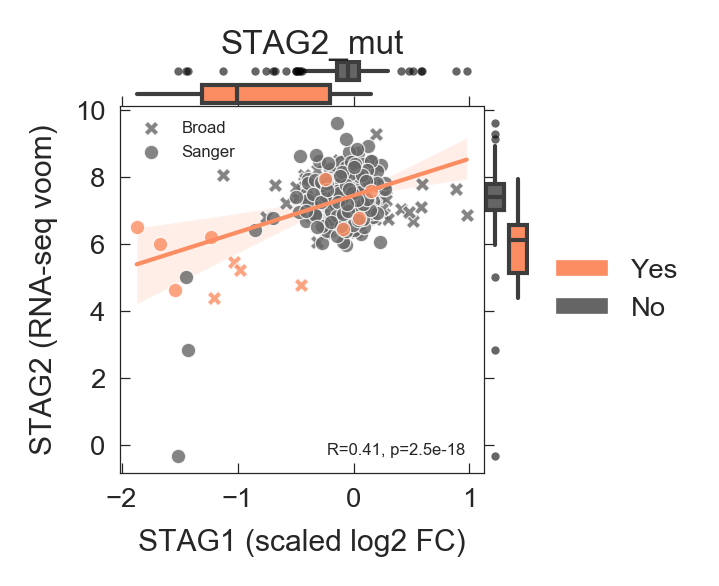

In [7]:
grid = RobustAssociations.plot_corrplot_discrete(
    f"crispr_{gene_crispr}", f"gexp_{gene_gexp}", gene_mut, "institute", plot_df
)
grid.set_axis_labels(f"{gene_crispr} (scaled log2 FC)", f"{gene_gexp} (RNA-seq voom)")
plt.suptitle(gene_mut, y=1.05, fontsize=8)
plt.gcf().set_size_inches(1.5, 1.5)
plt.savefig(
    f"{rpath}/robust_scatter_gexp_crispr_{gene_gexp}_{gene_crispr}_{gene_mut}.pdf",
    bbox_inches="tight",
    transparent=True,
)

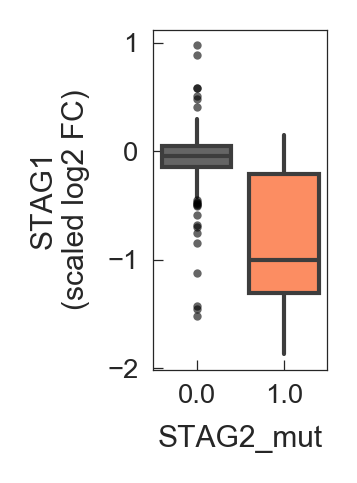

In [8]:
plt.figure(figsize=(0.75, 1.5), dpi=300)
g = RobustAssociations.plot_boxplot_discrete(gene_mut, f"crispr_{gene_crispr}", plot_df)
plt.ylabel(f"{gene_crispr}\n(scaled log2 FC)")
plt.gcf().set_size_inches(0.75, 1.5)
plt.savefig(
    f"{rpath}/robust_genomic_boxplot_{gene_mut}.pdf",
    bbox_inches="tight",
    transparent=True,
)

MCL1 robust association significantly correlated mutation

In [9]:
drug, gene_crispr, gene_mut = (2354, "MCL1_8070", "RS"), "MCL1", "PFKFB1"

In [10]:
plot_df = robust.assoc.build_df(
    drug=[drug], crispr=[gene_crispr], wes=[gene_mut], sinfo=["institute"]
).dropna()
plot_df = plot_df.rename(columns={drug: "drug"})

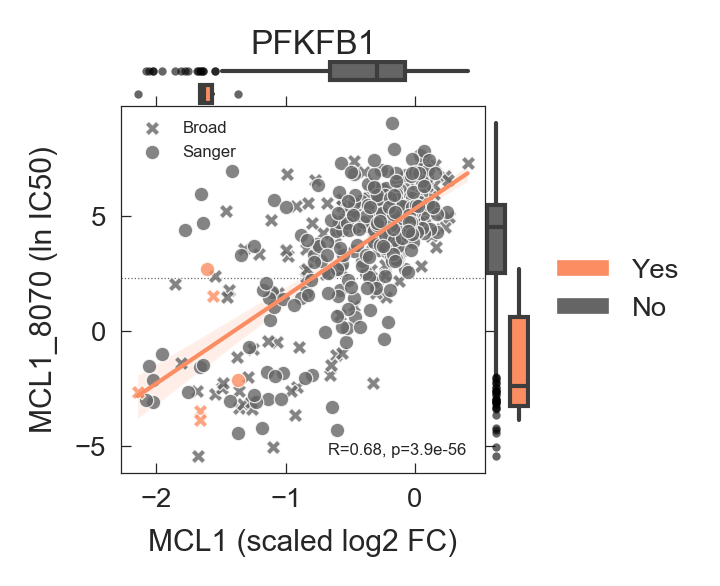

In [11]:
grid = RobustAssociations.plot_corrplot_discrete(
    f"crispr_{gene_crispr}", "drug", f"wes_{gene_mut}", "institute", plot_df
)
dmax = np.log(robust.assoc.drespo_obj.maxconcentration[drug])
grid.ax_joint.axhline(
    y=dmax, linewidth=0.3, color=robust.PAL_DTRACE[2], ls=":", zorder=0
)
grid.set_axis_labels(f"{gene_crispr} (scaled log2 FC)", f"{drug[1]} (ln IC50)")
plt.suptitle(gene_mut, y=1.05, fontsize=8)
plt.gcf().set_size_inches(1.5, 1.5)
plt.savefig(
    f"{rpath}/robust_scatter_wes_{drug[1]}_{gene_crispr}_{gene_mut}.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Copyright (C) 2019 Emanuel Goncalves